# Loading the MNIST dataset

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Downloading and Transforming the MNIST dataset

In [ ]:
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
train_set = MNIST(root='./data', train=True, download=True, transform=transform)
test_set = MNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 64

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)


In [ ]:
len(train_loader.dataset)

60000

# VGG16 architecture

In [ ]:
class VGG16(nn.Module):
    def __init__(self, activation):
        super(VGG16, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            activation,
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            activation,
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            activation,
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            activation,
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            activation,
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            activation,
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            activation,
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            activation,
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            activation,
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            activation,
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            activation,
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            activation,
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            activation,
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        
        self.fc_layers = nn.Sequential(
            nn.Linear(in_features=512, out_features=4096),
            activation,
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=4096),
            activation,
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=10),
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = torch.flatten(x, 1)
        x = self.fc_layers(x)
        return x

# Accuracy Function

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Train and Test Functions

In [ ]:
def train(model, criterion, optimizer, train_loader, test_loader, num_epochs):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []
    for epoch in range(num_epochs):
        train_loss = 0.0
        train_acc = 0.0
        test_loss = 0.0
        test_acc = 0.0

        # Train the model
        model.train()
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss
            train_acc += accuracy_fn(labels, outputs.argmax(dim=1))

        # Test the model
        model.eval()
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                test_loss += loss
                test_acc += accuracy_fn(labels, outputs.argmax(dim=1))

        # Calculate the average losses and accuracies
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        test_loss /= len(test_loader)
        test_acc /= len(test_loader)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

    return train_losses, train_accuracies, test_losses, test_accuracies


# a) Which Activation function is better?

For ReLU():
Epoch [1/10], Train Loss: 0.8841, Train Accuracy: 78.5698, Test Loss: 0.0985, Test Accuracy: 97.8603
Epoch [2/10], Train Loss: 0.0995, Train Accuracy: 97.9494, Test Loss: 0.0423, Test Accuracy: 98.9053
Epoch [3/10], Train Loss: 0.0502, Train Accuracy: 98.9206, Test Loss: 0.0331, Test Accuracy: 99.0545
Epoch [4/10], Train Loss: 0.0324, Train Accuracy: 99.3320, Test Loss: 0.0282, Test Accuracy: 99.1043
Epoch [5/10], Train Loss: 0.0215, Train Accuracy: 99.6035, Test Loss: 0.0250, Test Accuracy: 99.2536
Epoch [6/10], Train Loss: 0.0149, Train Accuracy: 99.7668, Test Loss: 0.0247, Test Accuracy: 99.1541
Epoch [7/10], Train Loss: 0.0112, Train Accuracy: 99.8368, Test Loss: 0.0229, Test Accuracy: 99.2337
Epoch [8/10], Train Loss: 0.0082, Train Accuracy: 99.9134, Test Loss: 0.0254, Test Accuracy: 99.2138
Epoch [9/10], Train Loss: 0.0064, Train Accuracy: 99.9467, Test Loss: 0.0221, Test Accuracy: 99.3133
Epoch [10/10], Train Loss: 0.0054, Train Accuracy: 99.9650, Test Loss: 0.0228, 

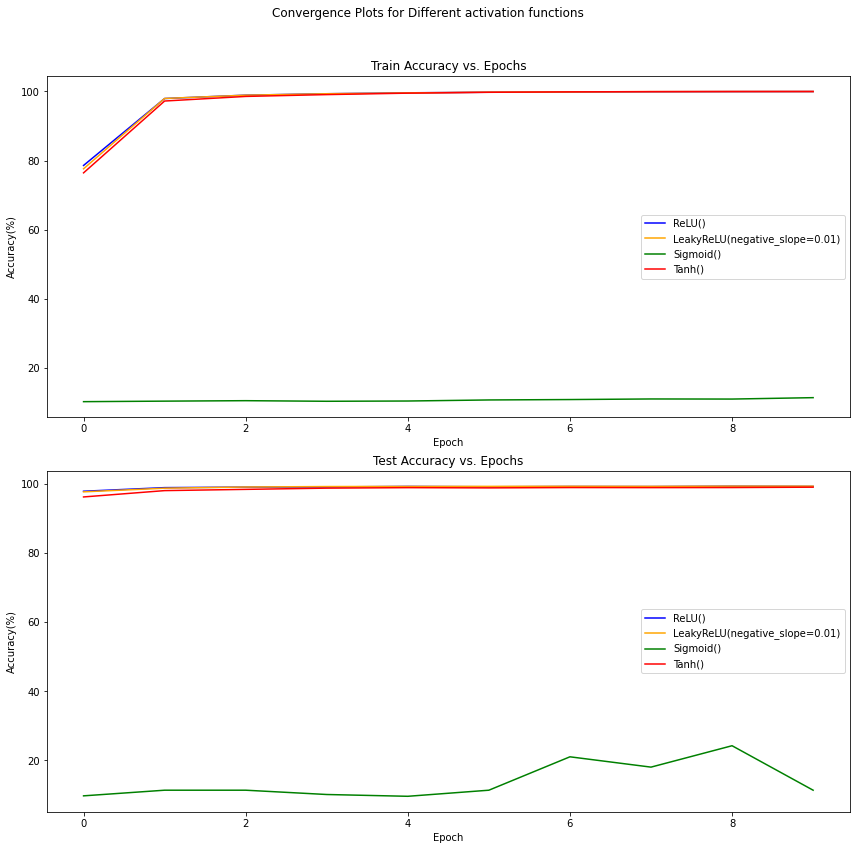

In [ ]:
import matplotlib.pyplot as plt

activations = [nn.ReLU(), nn.LeakyReLU(), nn.Sigmoid(), nn.Tanh()]
colors = ['blue', 'orange', 'green', 'red']

# Create a new figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

for i, activation in enumerate(activations):
    model = VGG16(activation=activation)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001)

    print(f"For {activation}:")
    train_losses, train_accuracies, test_losses, test_accuracies = train(model, criterion, optimizer, 
                                                                         train_loader, test_loader, num_epochs=10)

    # Plot the functions on the first subplot
    axs[0].plot(train_accuracies, label=str(activation), color=colors[i])
    axs[0].set_title('Train Accuracy vs. Epochs')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy(%)')
    axs[0].autoscale(enable=True, axis='Accuracy(%)')
    axs[0].legend()
    axs[1].plot(test_accuracies, label=str(activation), color=colors[i])
    axs[1].set_title('Test Accuracy vs. Epochs')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy(%)')
    axs[1].autoscale(enable=True, axis='Accuracy(%)')
    axs[1].legend()


# Call tight_layout to automatically adjust the spacing between subplots
plt.tight_layout()

# Add a title to the entire figure
fig.suptitle('Convergence Plots for Different activation functions')

# Adjust the top margin to make more space for the suptitle
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


#b) What learning rate is better?

For 1 Learning rate:
Epoch [1/10], Train Loss: nan, Train Accuracy: 9.8747, Test Loss: nan, Test Accuracy: 9.7830
Epoch [2/10], Train Loss: nan, Train Accuracy: 9.8681, Test Loss: nan, Test Accuracy: 9.7830
Epoch [3/10], Train Loss: nan, Train Accuracy: 9.8714, Test Loss: nan, Test Accuracy: 9.7830
Epoch [4/10], Train Loss: nan, Train Accuracy: 9.8697, Test Loss: nan, Test Accuracy: 9.7830
Epoch [5/10], Train Loss: nan, Train Accuracy: 9.8764, Test Loss: nan, Test Accuracy: 9.7830
Epoch [6/10], Train Loss: nan, Train Accuracy: 9.8747, Test Loss: nan, Test Accuracy: 9.7830
Epoch [7/10], Train Loss: nan, Train Accuracy: 9.8731, Test Loss: nan, Test Accuracy: 9.7830
Epoch [8/10], Train Loss: nan, Train Accuracy: 9.8731, Test Loss: nan, Test Accuracy: 9.7830
Epoch [9/10], Train Loss: nan, Train Accuracy: 9.8714, Test Loss: nan, Test Accuracy: 9.7830
Epoch [10/10], Train Loss: nan, Train Accuracy: 9.8731, Test Loss: nan, Test Accuracy: 9.7830
For 0.1 Learning rate:
Epoch [1/10], Train Loss:

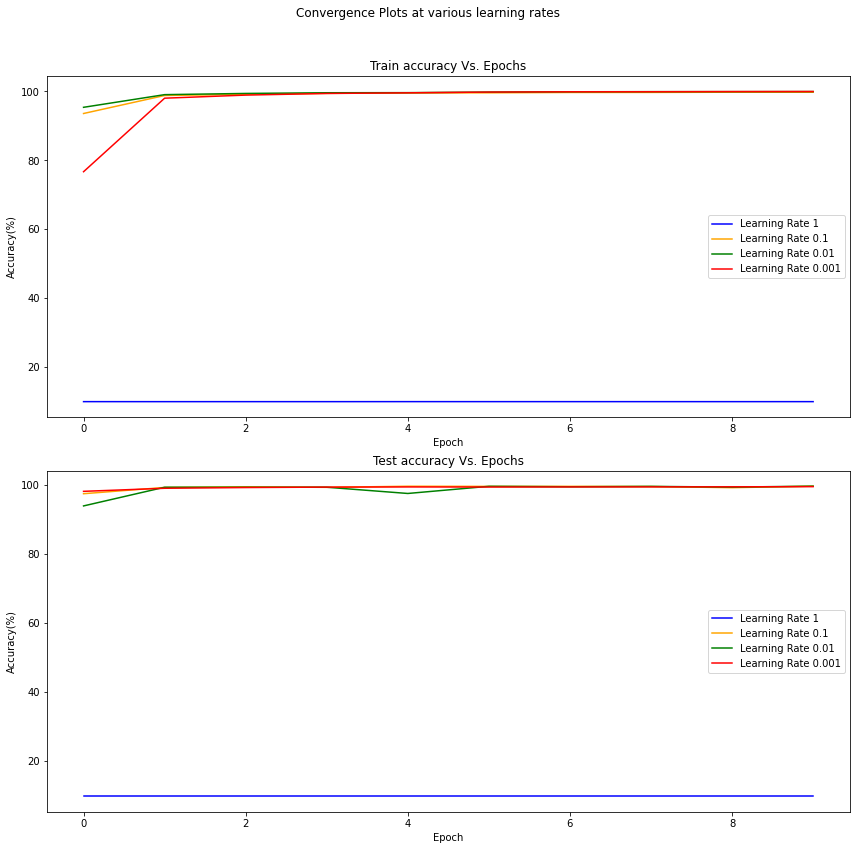

In [ ]:
import matplotlib.pyplot as plt

lrs = [1, 0.1, 0.01, 0.001]
colors = ['blue', 'orange', 'green', 'red']

# Create a new figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

for i, l_r in enumerate(lrs):
    model = VGG16(activation=nn.ReLU())
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=l_r)

    print(f"For {l_r} Learning rate:")
    train_losses, train_accuracies, test_losses, test_accuracies = train(model, criterion, optimizer, 
                                                                         train_loader, test_loader, num_epochs=10)
    
    # Plot the functions on the first subplot
    axs[0].plot(train_accuracies, label=f"Learning Rate {l_r}", color=colors[i])
    axs[0].set_title('Train accuracy Vs. Epochs')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy(%)')
    axs[0].legend()
    axs[1].plot(test_accuracies, label=f"Learning Rate {l_r}", color=colors[i])
    axs[1].set_title('Test accuracy Vs. Epochs')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy(%)')
    axs[1].legend()

# Call tight_layout to automatically adjust the spacing between subplots
plt.tight_layout()

# Add a title to the entire figure
fig.suptitle('Convergence Plots at various learning rates')

# Adjust the top margin to make more space for the suptitle
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


#c) Role of optimizer

For Vanilla Gradient descent Optimizer:
Epoch [1/10], Train Loss: 0.8951, Train Accuracy: 77.5620, Test Loss: 0.1037, Test Accuracy: 97.8702
Epoch [2/10], Train Loss: 0.1008, Train Accuracy: 97.9144, Test Loss: 0.0457, Test Accuracy: 98.7361
Epoch [3/10], Train Loss: 0.0525, Train Accuracy: 98.8723, Test Loss: 0.0308, Test Accuracy: 99.1242
Epoch [4/10], Train Loss: 0.0332, Train Accuracy: 99.2671, Test Loss: 0.0255, Test Accuracy: 99.1740
Epoch [5/10], Train Loss: 0.0226, Train Accuracy: 99.5502, Test Loss: 0.0244, Test Accuracy: 99.1939
Epoch [6/10], Train Loss: 0.0152, Train Accuracy: 99.7468, Test Loss: 0.0228, Test Accuracy: 99.2038
Epoch [7/10], Train Loss: 0.0110, Train Accuracy: 99.8418, Test Loss: 0.0222, Test Accuracy: 99.2038
Epoch [8/10], Train Loss: 0.0083, Train Accuracy: 99.9067, Test Loss: 0.0214, Test Accuracy: 99.2536
Epoch [9/10], Train Loss: 0.0067, Train Accuracy: 99.9250, Test Loss: 0.0203, Test Accuracy: 99.2536
Epoch [10/10], Train Loss: 0.0048, Train Accuracy: 

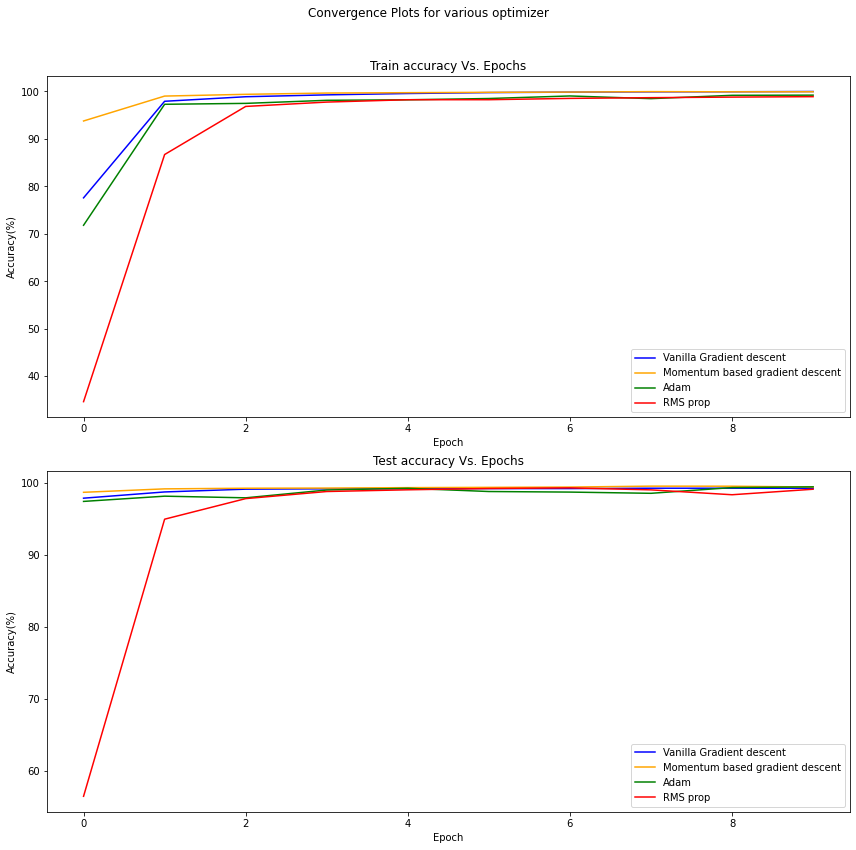

In [ ]:
optim_name = ['Vanilla Gradient descent', 'Momentum based gradient descent', 'Adam', 'RMS prop']
colors = ['blue', 'orange', 'green', 'red']

# Create a new figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

for i, opt_name in enumerate(optim_name):
    import torch.optim as optim
    model = VGG16(activation=nn.ReLU())
    model.to(device)

    optim = [optim.SGD(model.parameters(), lr=0.001), 
            optim.SGD(model.parameters(), lr=0.001, momentum=0.9),
            optim.Adam(model.parameters(), lr=0.001),
            optim.RMSprop(model.parameters(), lr=0.001)]

    criterion = nn.CrossEntropyLoss()
    optimizer = optim[i]

    print(f"For {optim_name[i]} Optimizer:")
    train_losses, train_accuracies, test_losses, test_accuracies = train(model, criterion, optimizer, 
                                                                         train_loader, test_loader, num_epochs=10)
    
    # Plot the functions on the first subplot
    axs[0].plot(train_accuracies, label=optim_name[i], color=colors[i])
    axs[0].set_title('Train accuracy Vs. Epochs')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy(%)')
    axs[0].legend()
    axs[1].plot(test_accuracies, label=optim_name[i], color=colors[i])
    axs[1].set_title('Test accuracy Vs. Epochs')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy(%)')
    axs[1].legend()

# Call tight_layout to automatically adjust the spacing between subplots
plt.tight_layout()

# Add a title to the entire figure
fig.suptitle('Convergence Plots for various optimizer')

# Adjust the top margin to make more space for the suptitle
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

# Model with best parameters

Model With Best Parameters:
Epoch [1/7], Train Loss: 0.2088, Train Accuracy: 93.9432, Test Loss: 0.0400, Test Accuracy: 98.6664
Epoch [2/7], Train Loss: 0.0338, Train Accuracy: 99.0072, Test Loss: 0.0255, Test Accuracy: 99.1441
Epoch [3/7], Train Loss: 0.0193, Train Accuracy: 99.4203, Test Loss: 0.0260, Test Accuracy: 99.2038
Epoch [4/7], Train Loss: 0.0142, Train Accuracy: 99.5852, Test Loss: 0.0238, Test Accuracy: 99.2735
Epoch [5/7], Train Loss: 0.0092, Train Accuracy: 99.7185, Test Loss: 0.0200, Test Accuracy: 99.3830
Epoch [6/7], Train Loss: 0.0068, Train Accuracy: 99.8084, Test Loss: 0.0176, Test Accuracy: 99.4725
Epoch [7/7], Train Loss: 0.0044, Train Accuracy: 99.8734, Test Loss: 0.0199, Test Accuracy: 99.4327


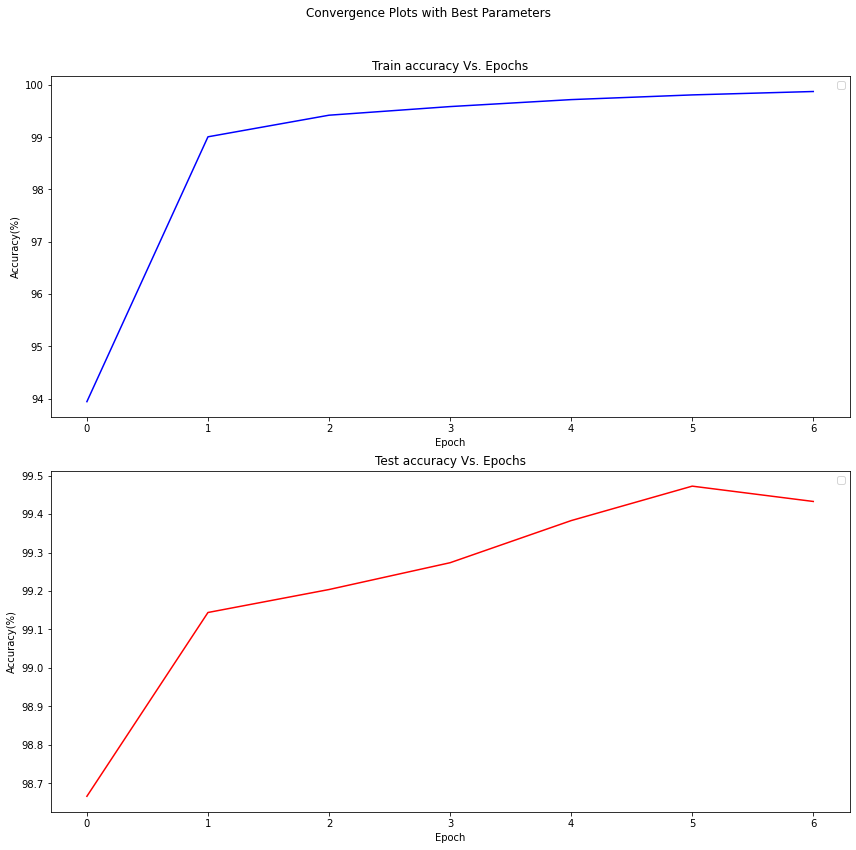

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

model = VGG16(activation=nn.ReLU())
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

print(f"Model With Best Parameters:")
train_losses, train_accuracies, test_losses, test_accuracies = train(model, criterion, optimizer, 
                                                                         train_loader, test_loader, num_epochs=7)

# Save the weights
torch.save(model.state_dict(), 'vgg16_weights.pth')

# Create a new figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
# Plot the functions on the first subplot
axs[0].plot(train_accuracies, color='blue')
axs[0].set_title('Train accuracy Vs. Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy(%)')
axs[0].legend()
axs[1].plot(test_accuracies, color='red')
axs[1].set_title('Test accuracy Vs. Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy(%)')
axs[1].legend()

# Call tight_layout to automatically adjust the spacing between subplots
plt.tight_layout()

# Add a title to the entire figure
fig.suptitle('Convergence Plots with Best Parameters')

# Adjust the top margin to make more space for the suptitle
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

#d) Transfer Learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=transform, download=True)
test_dataset = MNIST(root='data/', train=False, transform=transform, download=True)

In [ ]:
train_dataset.targets[:10], test_dataset.targets[:10]

(tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

In [ ]:
# Create a function to reform the labels
def reform_labels(y):
    # Set C: {0, 2, 3, 5, 6, 8, 9} - the set of digits with curved stroke(s)
    y_new = torch.where(torch.isin(y, torch.tensor([0, 2, 3, 5, 6, 8, 9])), torch.tensor(0), y)

    # Set S: {1, 4, 7} - the set of digits with straight stroke(s)
    y_new = torch.where(torch.isin(y_new, torch.tensor([1, 4, 7])), torch.tensor(1), y_new)

    return y_new

In [ ]:
# Reform the labels of the training set
train_labels_reformed = reform_labels(train_dataset.targets)

# Reform the labels of the test set
test_labels_reformed = reform_labels(test_dataset.targets)

# Update the targets of the datasets with the reformatted labels
train_dataset.targets = train_labels_reformed
test_dataset.targets = test_labels_reformed

In [ ]:
train_dataset.targets[:10], test_dataset.targets[:10]

(tensor([0, 0, 1, 1, 0, 0, 1, 0, 1, 1]),
 tensor([1, 0, 1, 0, 1, 1, 1, 0, 0, 0]))

In [ ]:
batch_size = 64

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Load the weights
model = VGG16(activation=nn.ReLU())
model.load_state_dict(torch.load('vgg16_weights.pth'))

<All keys matched successfully>

In [ ]:
# Modify the last layer to classify 2 classes (0 and 1)
num_features = model.fc_layers[-1].in_features
model.fc_layers[-1] = nn.Linear(num_features, 2)

In [ ]:
model.to(device)
model.fc_layers

Sequential(
  (0): Linear(in_features=512, out_features=4096, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=2, bias=True)
)

In [ ]:
# Freeze all layers
for param in model.parameters():
    param.requires_grad = False
# Unfreezing the last layer
model.fc_layers[6].weight.requires_grad = True
model.fc_layers[6].bias.requires_grad = True

for name, param in model.named_parameters():
    print(name, param.requires_grad)

conv_layers.0.weight False
conv_layers.0.bias False
conv_layers.1.weight False
conv_layers.1.bias False
conv_layers.3.weight False
conv_layers.3.bias False
conv_layers.4.weight False
conv_layers.4.bias False
conv_layers.7.weight False
conv_layers.7.bias False
conv_layers.8.weight False
conv_layers.8.bias False
conv_layers.10.weight False
conv_layers.10.bias False
conv_layers.11.weight False
conv_layers.11.bias False
conv_layers.14.weight False
conv_layers.14.bias False
conv_layers.15.weight False
conv_layers.15.bias False
conv_layers.17.weight False
conv_layers.17.bias False
conv_layers.18.weight False
conv_layers.18.bias False
conv_layers.20.weight False
conv_layers.20.bias False
conv_layers.21.weight False
conv_layers.21.bias False
conv_layers.24.weight False
conv_layers.24.bias False
conv_layers.25.weight False
conv_layers.25.bias False
conv_layers.27.weight False
conv_layers.27.bias False
conv_layers.28.weight False
conv_layers.28.bias False
conv_layers.30.weight False
conv_layers.

In [ ]:
# Define binary cross-entropy loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.fc_layers[-1].parameters(), lr=0.001, momentum=0.9)

Epoch [1/10], Train Loss: 0.0121, Train Accuracy: 99.6602, Test Loss: 0.0073, Test Accuracy: 99.7412
Epoch [2/10], Train Loss: 0.0030, Train Accuracy: 99.9350, Test Loss: 0.0071, Test Accuracy: 99.7512
Epoch [3/10], Train Loss: 0.0026, Train Accuracy: 99.9434, Test Loss: 0.0074, Test Accuracy: 99.7512
Epoch [4/10], Train Loss: 0.0025, Train Accuracy: 99.9234, Test Loss: 0.0084, Test Accuracy: 99.7313
Epoch [5/10], Train Loss: 0.0020, Train Accuracy: 99.9500, Test Loss: 0.0076, Test Accuracy: 99.7512
Epoch [6/10], Train Loss: 0.0020, Train Accuracy: 99.9417, Test Loss: 0.0077, Test Accuracy: 99.7611
Epoch [7/10], Train Loss: 0.0017, Train Accuracy: 99.9434, Test Loss: 0.0073, Test Accuracy: 99.7412
Epoch [8/10], Train Loss: 0.0016, Train Accuracy: 99.9450, Test Loss: 0.0077, Test Accuracy: 99.7512
Epoch [9/10], Train Loss: 0.0016, Train Accuracy: 99.9567, Test Loss: 0.0078, Test Accuracy: 99.7611
Epoch [10/10], Train Loss: 0.0018, Train Accuracy: 99.9434, Test Loss: 0.0092, Test Accurac

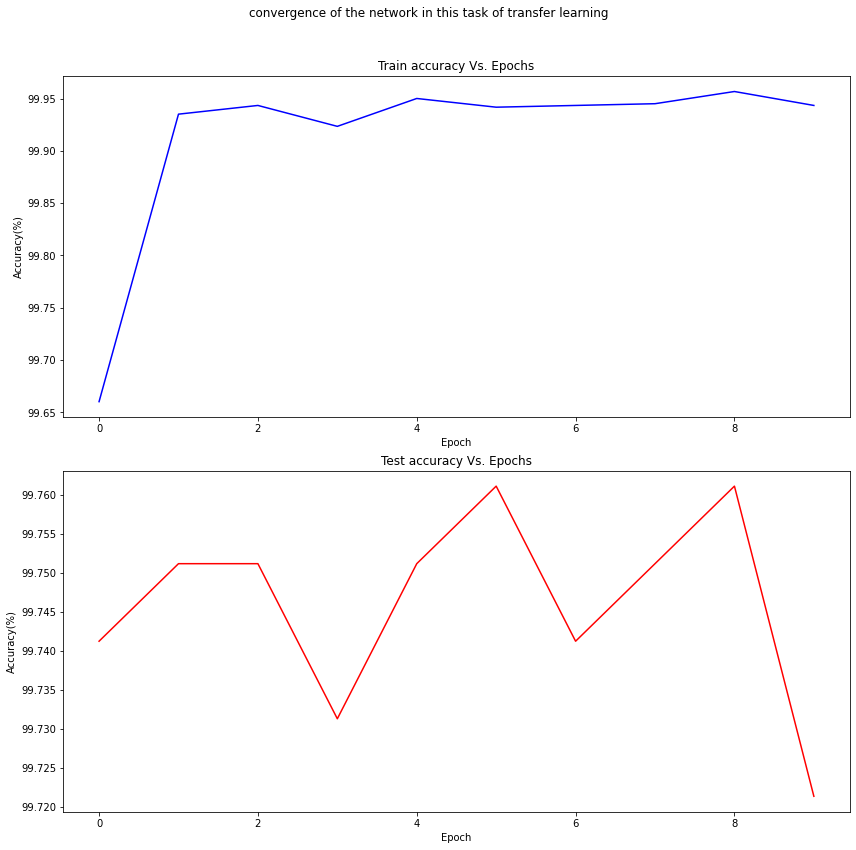

In [ ]:
train_losses, train_accuracies, test_losses, test_accuracies = train(model, criterion, optimizer, 
                                                                      train_dataloader, test_dataloader, num_epochs=10)

# Create a new figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
# Plot the functions on the first subplot
axs[0].plot(train_accuracies, color='blue')
axs[0].set_title('Train accuracy Vs. Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy(%)')
# axs[0].legend()
axs[1].plot(test_accuracies, color='red')
axs[1].set_title('Test accuracy Vs. Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy(%)')
# axs[1].legend()

# Call tight_layout to automatically adjust the spacing between subplots
plt.tight_layout()

# Add a title to the entire figure
fig.suptitle('convergence of the network in this task of transfer learning')

# Adjust the top margin to make more space for the suptitle
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()